In [1]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['figure.figsize'] = (8,5)
plt.style.use('fivethirtyeight')

In [3]:
chapters = open('data/lw.txt').read().split('CHAPTER ')[1:]

In [4]:
# Counts of names in the chapters of Little Women

counts = bpd.DataFrame().assign(
    Amy=np.char.count(chapters, 'Amy'),
    Beth=np.char.count(chapters, 'Beth'),
    Jo=np.char.count(chapters, 'Jo'),
    Meg=np.char.count(chapters, 'Meg'),
    Laurie=np.char.count(chapters, 'Laurie'),
)
counts

# cumulative number of times each name appears

lw_counts = bpd.DataFrame().assign(
    Amy=np.cumsum(counts.get('Amy')),
    Beth=np.cumsum(counts.get('Beth')),
    Jo=np.cumsum(counts.get('Jo')),
    Meg=np.cumsum(counts.get('Meg')),
    Laurie=np.cumsum(counts.get('Laurie')),
    Chapter=np.arange(1, 48, 1)
)

# Lecture 5 

## Visualization

# Little Women

- Who is the main character?
- Which pair of characters gets married in Chapter 35?

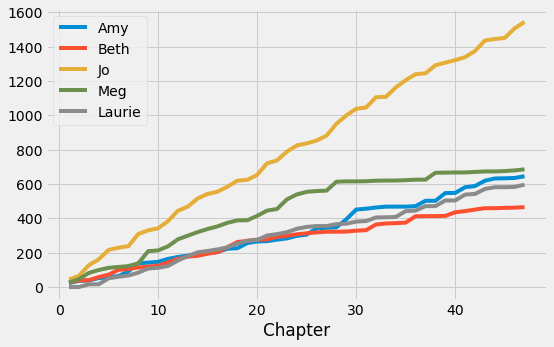

In [5]:
lw_counts.plot(x='Chapter')

## Napoleon's March

<img src="./data/minard.jpg"/>

## Why visualize?

- Tables can be hard to interpret.
- We hope to spot trends through visualization.
- Many types: scatter plots, line graphs, bar charts, etc.
- The right choice depends on the type of data.

## Some terminology...

- **Individual**: Person/place/thing for which data is recorded.
- **Variable**: Something that is recorded for each individual, a.k.a. a "feature".

Variables can be of different kinds, including:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories.

## Examples of numerical variables

- Individual is an NBA player, variable is salary
- Individual is a movie, variable is gross
- Individual is a baby, variable is weight in kilograms

## Examples of categorical variables

- Individual is an NBA player, variable is team name
- Individual is a person in the census, variable is zip code
    - Even though looks like a number!
- Individual is a movie, variable is genre.

# Today

- Scatter Plot: numerical vs. numerical
- Line Plot: sequential numerical vs. numerical
- Bar Chart: categorical vs. numerical
- Histogram: distribution of categorical

In [6]:
import babypandas as bpd
import numpy as np

# import/configure visualization tools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Scatter plots

## A new dataset: `actors.csv`

|Column |Contents|
|----------|------------|
Actor|Name of actor
Total Gross|	Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
Number of Movies|	The number of movies the actor has been in
Average per Movie|	Total gross divided by number of movies
#1 Movie|	The highest grossing movie the actor has been in
Gross|	Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

In [8]:
actors = bpd.read_csv('data/actors.csv').set_index('Actor')
actors

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
...,...,...,...,...,...
Jeremy Renner,2500.3,21,119.1,The Avengers,623.4
Philip Seymour Hoffman,2463.7,40,61.6,Catching Fire,424.7
Sandra Bullock,2462.6,35,70.4,Minions,336.0


## Scatter plots

What is the relationship between `Number of Movies` and `Total Gross`?

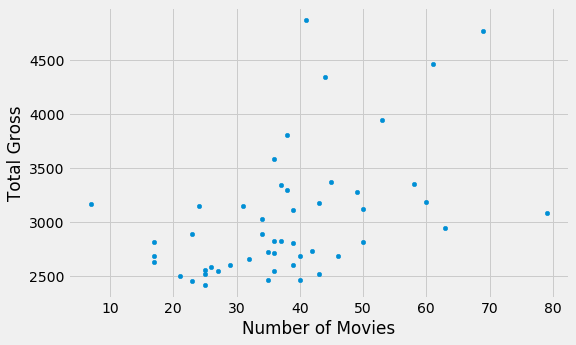

In [9]:
actors.plot(kind='scatter', x='Number of Movies', y='Total Gross')

## Scatter plots

- Visualize relationship between two numerical variables
```
dataframe.plot(
    kind='scatter', 
    x=x_column_name, 
    y=y_column_name
)
```
- First argument: the type of plot (scatter plot)
- Second argument: column for horizontal axis variable
- Third argument: column for vertical axis variable
- One point per row

## Scatter plots

What is the relationship between `Number of Movies` and `Average per Movie`?

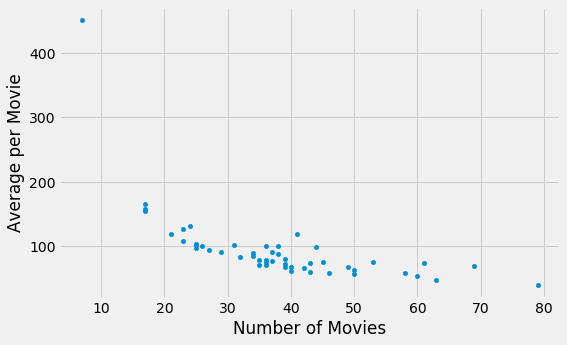

In [10]:
#- scatter plot
actors.plot(kind='scatter', x='Number of Movies', y='Average per Movie')

## Two interesting things...

- A *negative* association.
- An outlier.

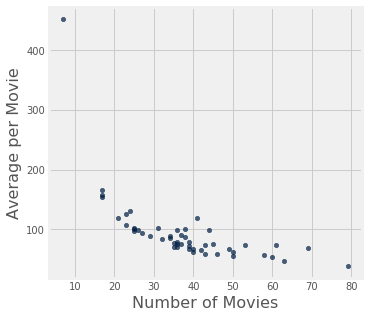


## Who are these people?

In [11]:
#- get the actors for which "Number of Movies" > 60
actors[actors.get('Number of Movies') > 60]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


## Who is the outlier?

- Made very few, high grossing movies.

In [12]:
actors[actors.get('Number of Movies') < 10]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


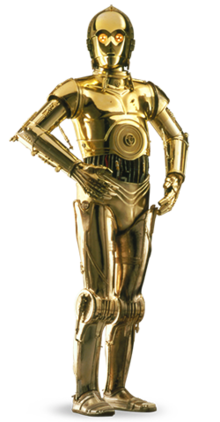

# Line graphs

## More new data: `movies_by_year.csv`

|Column|	Content|
|------|-----------|
Year|	Year
Total Gross|	Total domestic box office gross, in millions of dollars, of all movies released
Number of Movies|	Number of movies released
#1 Movie|	Highest grossing movie

In [14]:
#: read from csv
movies_by_year = bpd.read_csv('data/movies_by_year.csv').set_index('Year')
movies_by_year

,Total Gross,Number of Movies,#1 Movie
Year,,,
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
...,...,...,...
1984,4031.0,536,Beverly Hills Cop
1983,3766.0,495,Return of the Jedi
1982,3453.0,428,E.T.


## Line graphs

- How has the number of movies changed over time?

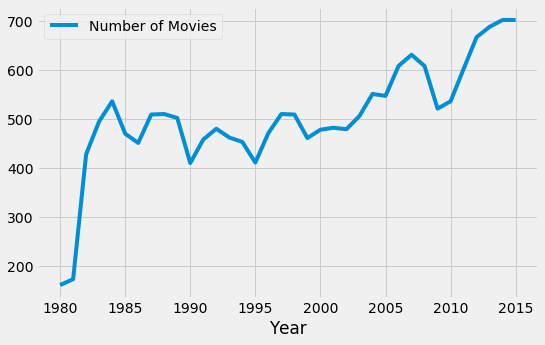

In [15]:
movies_by_year.plot(kind='line', y='Number of Movies')

## Line graphs

- Visualize sequential numerical vs numerical.
- Often used for trends in time.
```
dataframe.plot(
    kind='line', 
    x=x_column_label, 
    y=y_column_label
)
```
- First argument: kind of plot (line)
- Second argument: column for horizontal axis.
- Third argument: column for vertical axis.

## Plotting Tip

- **Tip**: if you want x-axis to be the index, omit the `x=` argument!
- Works for scatter plots, line plots, etc.

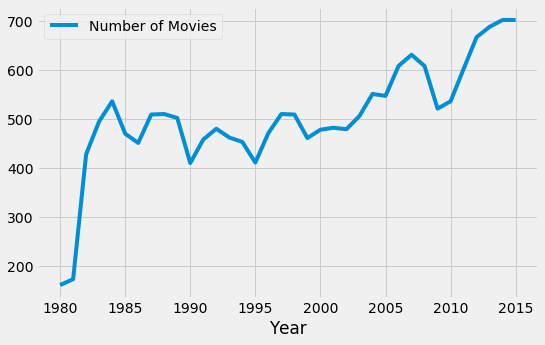

In [16]:
movies_by_year.plot(kind='line', y='Number of Movies')

## Aside: Multiple Selections

- Let's focus on 2000-2012.
- We know how to select > 2000.
- And know how to selection < 2013.
- How do we select **between** 2000 and 2013?

In [17]:
movies_by_year.index > 2000

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [18]:
movies_by_year.index < 2013

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [19]:
(movies_by_year.index > 2000) & (movies_by_year.index < 2013)

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [20]:
movies_by_year[
    (movies_by_year.index > 2000) 
    & 
    (movies_by_year.index < 2013)
]

,Total Gross,Number of Movies,#1 Movie
Year,,,
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
...,...,...,...
2005,8840.5,547,Revenge of the Sith
2004,9380.5,551,Shrek 2
2003,9239.7,506,Return of the King


## The `&` operator

- Takes two boolean arrays of same size.
- Returns one boolean array in which an element is `True` only if the corresponding element in each input array is `True`.
- Parentheses are important!

In [21]:
#- years before 1995 in which more than 500 movies were released


## Focus on 2000-2013:

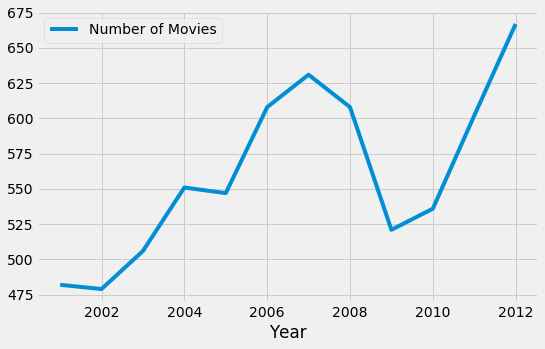

In [22]:
# let's focus on recent years (2000-2013)
(
    movies_by_year[
        (movies_by_year.index > 2000) & (movies_by_year.index < 2013)
    ]
    .plot(kind='line', y='Number of Movies')
)

What happened in 2009/2010?

## How did this affect total gross?

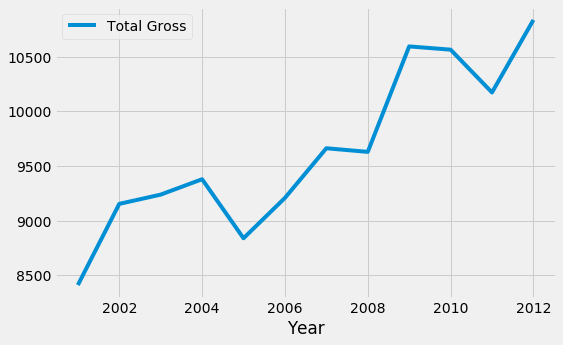

In [23]:
# let's focus on recent years (2000-2013)
(
    movies_by_year[
        (movies_by_year.index > 2000) & (movies_by_year.index < 2013)
    ]
    .plot(kind='line', y='Total Gross')
)

## Trivia: what was the top movie of 2009?

In [24]:
movies_by_year.get('#1 Movie').loc[2009]

'Avatar'

## Discussion question

What was the top grossing movie of 1989?

    A. Batman
    B. Independence Day
    C. E.T.
    D. Toy Story
    E. Forrest Gump

## Answer

In [25]:
def is_an_answer(s):
    return s in ['Batman', 'Independence Day', 'E.T.', 'Toy Story', 'Forrest Gump']

movies_by_year[movies_by_year.get('#1 Movie').apply(is_an_answer)]

,Total Gross,Number of Movies,#1 Movie
Year,,,
1996,5911.5,471,Independence Day
1995,5493.5,411,Toy Story
1994,5396.2,453,Forrest Gump
1989,5033.4,502,Batman
1982,3453.0,428,E.T.


# Bar Charts

## Yet another new data set: `top_movies.csv`

In [27]:
#: read in the csv
top_movies = bpd.read_csv('data/top_movies.csv').set_index('Title')
top_movies

,Studio,Gross,Gross (Adjusted),Year
Title,,,,
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...
The Caine Mutiny,Columbia,21750000,386173500,1954
The Bells of St. Mary's,RKO,21333333,545882400,1945
Duel in the Sun,Selz.,20408163,443877500,1946


## Bar Charts

How many top movies has each studio released?

In [28]:
#- make a Series of counts
s = top_movies.groupby('Studio').count().get('Gross')
s

Studio
AVCO                        1
Buena Vista (Disney)       29
Columbia                   10
Disney                     11
Dreamworks                  3
                           ..
TriS                        2
UA                          6
Universal                  22
Warner Bros.               29
Warner Bros. (New Line)     1
Name: Gross, Length: 24, dtype: int64

In [29]:
#- put it into a table called "count"
count = bpd.DataFrame().assign(
    Count=s
)
count

,Count
Studio,
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
...,...
TriS,2
UA,6
Universal,22


## Bar charts

- Height (vertical size) and spacing of bars is arbitrary.
- Only one numerical variable (horizontal axis)
- Order of vertical labels doesn't matter
- Somewhat confusing: `y='Count'`, but counts are on $x$ axis.

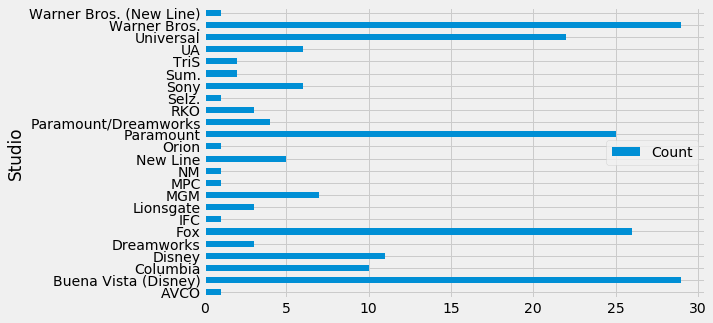

In [30]:
count.plot(kind='barh', y='Count')

## A (slightly) nicer visualization...

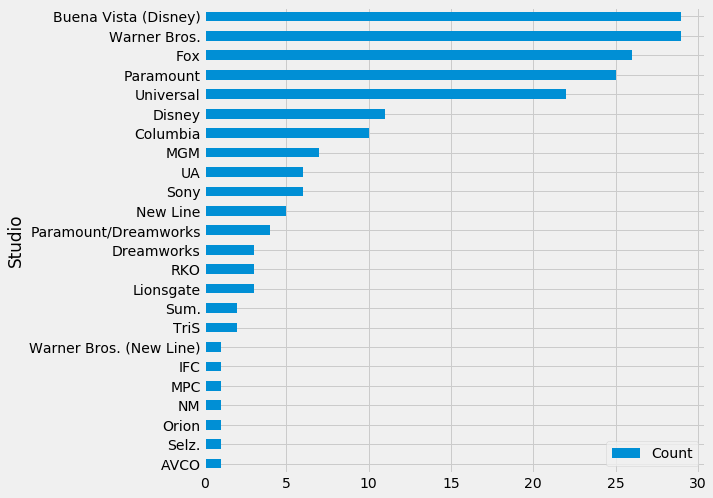

In [31]:
# sort the columns before plotting and make the plot bigger
count.sort_values('Count').plot(kind='barh', figsize=[8,8])

## Vertical bar charts

- Use `kind='bar'` instead of `kind='barh'`

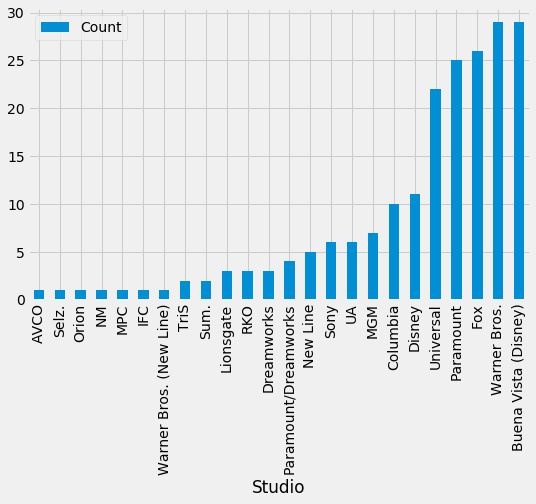

In [32]:
# sort the columns before plotting and make the plot bigger
count.sort_values('Count').plot(kind='bar', y='Count')

### Discussion question

Suppose we run this code. What do we get?

- A) A bar for each movie. Its length is the age of the movie.
- B) A bar for each age. Its length is the # of movies of that age.
- C) A bar for each age. Its length is the number of studios which produced movies of that age.

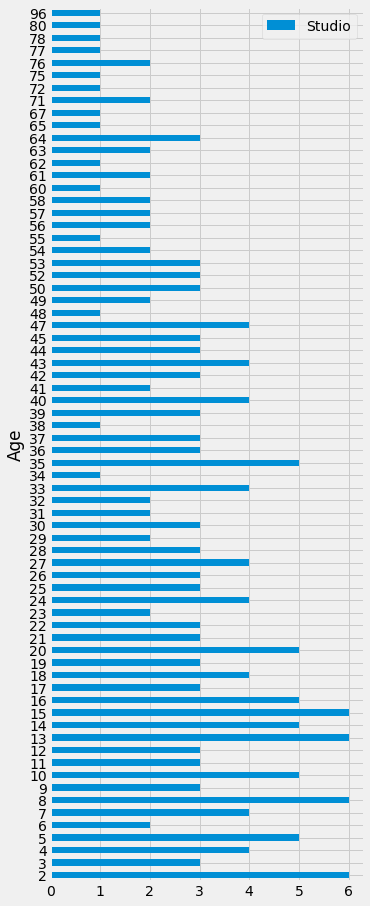

In [33]:
top_movies.assign(
    Age=2017 - top_movies.get('Year')
).groupby('Age').count().plot(kind='barh', y='Studio', figsize=[5,15])

## Star Wars

- Which Star Wars movie was most successful by adjusted gross?
- How do we select all rows whose labels contain "Star Wars"?

## Answer: `index.str.contains()`

In [34]:
top_movies.index.str.contains('Star Wars')

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Also works on columns:

In [35]:
top_movies[top_movies.get('Studio').str.contains('Disney')]

,Studio,Gross,Gross (Adjusted),Year
Title,,,,
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
Pirates of the Caribbean: Dead Man's Chest,Buena Vista (Disney),423315812,562266800,2006
The Lion King,Buena Vista (Disney),422783777,775573900,1994
...,...,...,...,...
Peter Pan,Disney,87404651,396924700,1953
Pinocchio,Disney,84254167,586409000,1940
Fantasia,Disney,76408097,722478200,1941


## Which Star Wars movie was most successful?

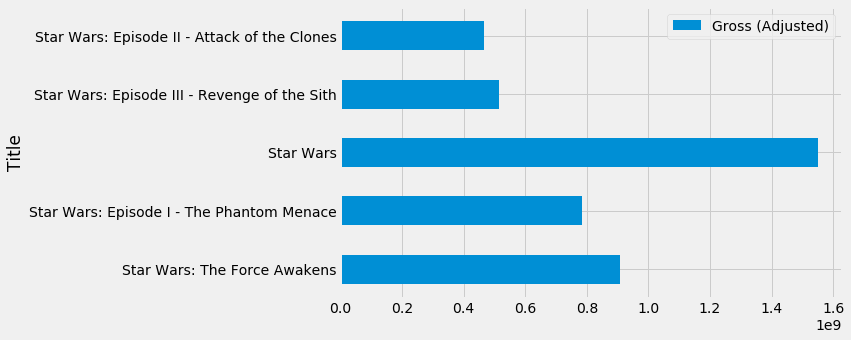

In [36]:
(
    top_movies[top_movies.index.str.contains('Star Wars')]
    .plot(kind='barh', y='Gross (Adjusted)')
)

# Histograms

### Visualizing distributions of numerical values

## Distribution of adjusted gross


- $x$ axis: adjusted gross (numerical)
- $y$ axis: a bar whose height encodes how many movies made about that much money
- group by adjusted gross, count, bar chart?

<img src="./histo.png"/>

In [37]:
top_movies.groupby('Gross (Adjusted)').count()

,Studio,Gross,Year
Gross (Adjusted),,,
322261900,1,1,1
322697700,1,1,1
323343300,1,1,1
324201800,1,1,1
326064000,1,1,1
...,...,...,...
1178627900,1,1,1
1234132700,1,1,1
1239013800,1,1,1


## Plotting Histograms

- Call `.plot(kind='hist', y=column_name)`.
- Automatically places numbers into *bins*.
- Height of bar is *number* of values in corresponding *bin*.
- Optional: specify number of bins with `bins=`.

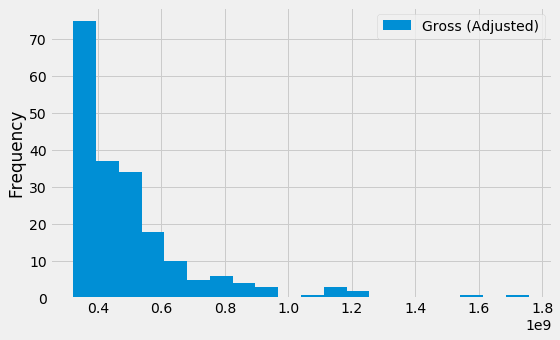

In [38]:
top_movies.plot(kind='hist', y='Gross (Adjusted)', bins=20)

## Distribution of movies released by year

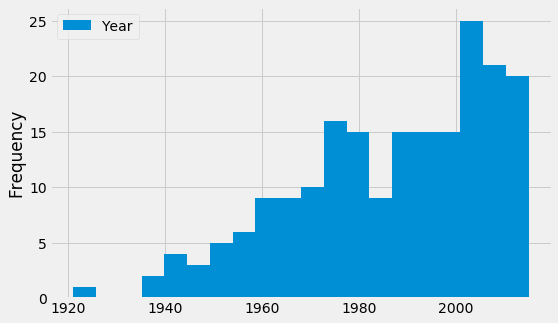

In [39]:
top_movies.plot(kind='hist', y='Year', bins=20)

## Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Bins are defined by their lower bounds (inclusive)
* The upper bound is the lower bound of the next bin

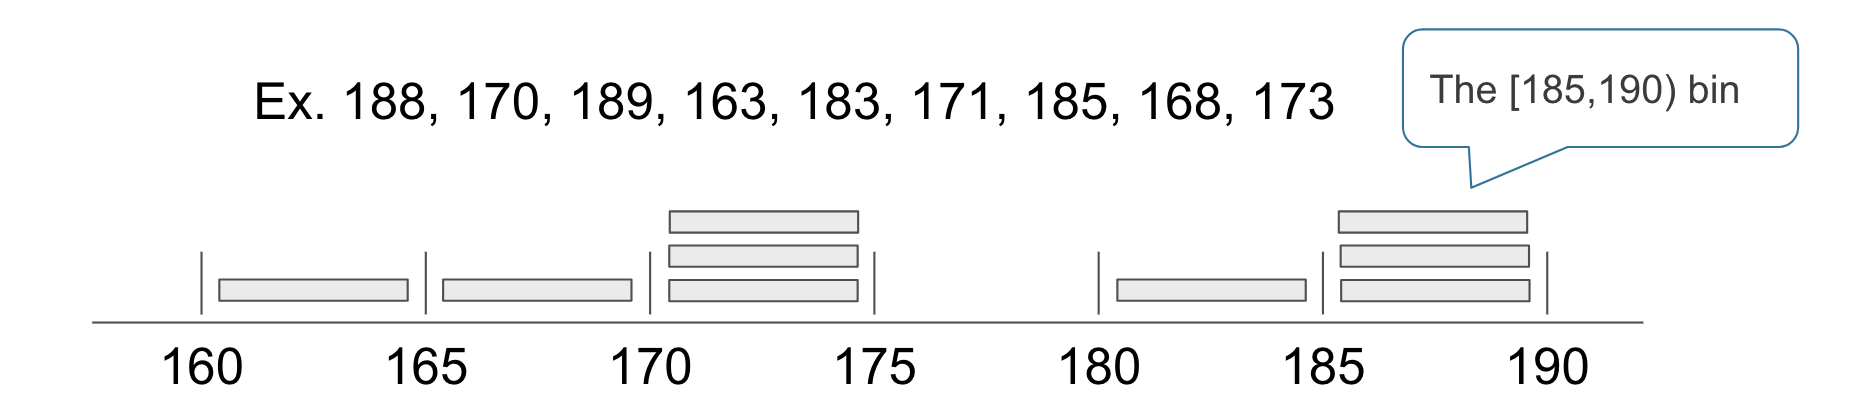    

## Custom Bins

- Can specify your own bins with a list.
- `bins=[1900, 1970, 1980, 1995, 2015]` creates bins: [1900, 1970), [1970, 1980), [1980, 1995), [1995, 2015]
- Note: last bin is inclusive!
- **Warning**: Data points not in any bin are not counted.

<center>
<img src="./data/bins.png"/>
</center>

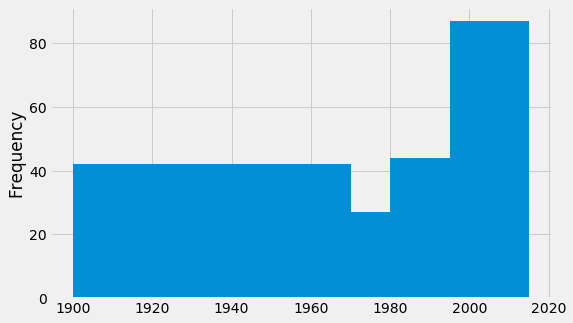

In [41]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins)

## A Problem

- It looks like a lot of movies were released every year between 2900 and 1970.
- But it's just because the bin is big.
- Actually: low number of movies released per year.
- Fix: use `density=True` keyword argument to make a *density histogram*.

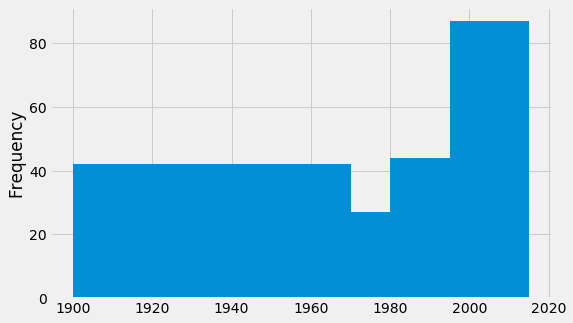

In [42]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins)

## Fix: Normalize bar by it's width

- Use the `density=True` keyword argument

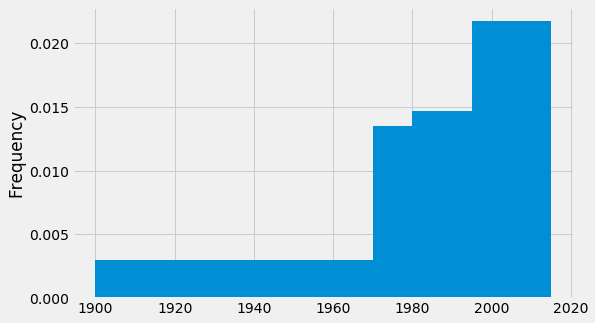

In [43]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins, density=True)

## Key Fact about Density Histograms

The **area** of a bar in a density histogram is:

- equal to the % of all data points that fall into that bin.
- equivalently, the probability that a data point, selected at random, falls into that bin.

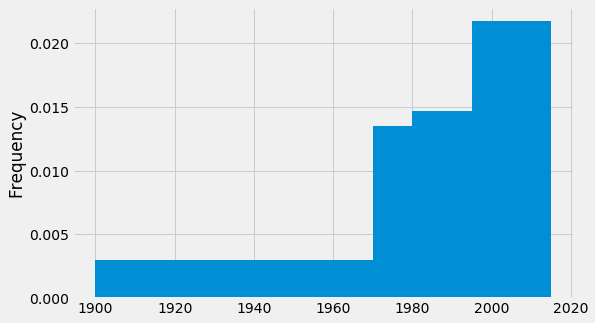

In [44]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins, density=True)

### How to calculate height in density histogram

- $\text{Area} = \text{Height} * \text{Width}$
- So $\text{Height} = \text{Area} / \text{Width} = \text{Percent} / \text{Width}$

**Example**: The $[1900, 1970)$ bin contains 42 out of 200 movies.
* So area is $42/200 = 21\%$
* The bin is $1970 - 1900 = 70$ years wide.

$$ \rm{Height\ of\ bar} = \frac{\rm{Area}}{\rm{Width}} = \frac{21 \%}{70\rm{\ years}} = 0.03\%\rm{\ per\ year} $$


## Important

In this class, "histogram" means "density histogram".

## Bar Charts vs. Histograms

Bar Chart | Histogram
---|---
1 categorical axis & 1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, widths and spacing | Horizontal axis is numerical and to scale
For distributions, height of bars are proportional to the percent of individuals | Height measures density; areas are proportional to the percent of individuals